In [5]:
!pip install hmmlearn==0.3.3
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
plt.rcParams['text.usetex'] = False

In [6]:
state_dict = {
    '0' : np.array([0,1]),
    '1' : np.array([1,0]),
    'a' : np.array([1,1])}

def plot_seq_online(seq, draw_dot_at = False):
    x = []
    for i in range(len(seq)):
        x.append(state_dict[seq[i]])
    x = np.stack(x)
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
    model.fit(x[:-1,:]) # excluding last element from seq
    score = []
    for i in range(1,x.shape[0]+1):
        score.append(model.score(x[:i]))
    score = np.array(score)
    print(len(seq), len(score))
    s = score[1:] - score[:-1]
    s = np.insert(s,0, s.max())
    plt.plot(np.array(range(len(s)))+1, -s)
    if draw_dot_at:
        plt.plot(len(s),-s[-1],'ro')
    plt.xlabel('Event', fontsize=25)
    plt.ylabel('Score $s$', fontsize=25) # ($-\log P(o_{i}|o_{1}\dots o_{i-1}$)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)

def plot_seq_offline(seq, draw_dot_at = False):
    x = []
    for i in range(len(seq)):
        x.append(state_dict[seq[i]])
    x = np.stack(x)
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
    model.fit(x[:,:]) # excluding last element from seq
    score = []
    for i in range(1,x.shape[0]+1):
        score.append(model.score(x[:i]))
    score = np.array(score)
    print(len(seq), len(score))
    s = score[1:] - score[:-1]
    s = np.insert(s,0, s.max())
    plt.plot(np.array(range(len(s)))+1, -s)
    if draw_dot_at:
        plt.plot(len(s),-s[-1],'ro')
    plt.xlabel('Event', fontsize=25)
    plt.ylabel('Score $s$', fontsize=25) # ($-\log P(o_{i}|o_{1}\dots o_{i-1}$)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)

8 8


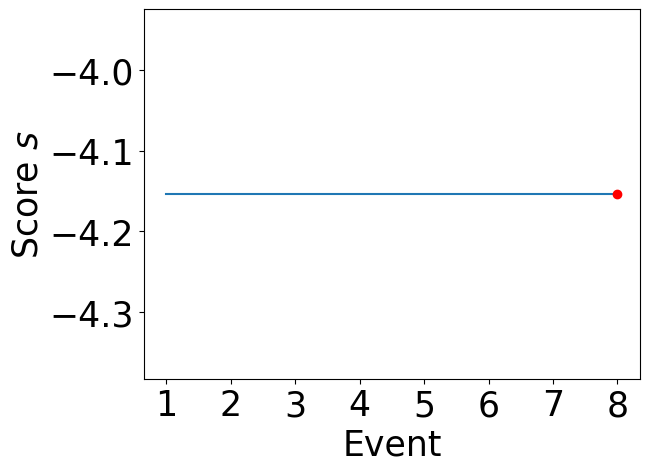

In [21]:
seq = ['0','1','0','1','0','1','0','1']
plot_seq_offline(seq,True)
plt.savefig('/content/' + ''.join(seq) + '.svg', format='svg', bbox_inches='tight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')